In [2]:
df <- tibble::tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)

df$a <- (df$a - min(df$a, na.rm = TRUE)) / 
  (max(df$a, na.rm = TRUE) - min(df$a, na.rm = TRUE))
df$b <- (df$b - min(df$b, na.rm = TRUE)) / 
  (max(df$b, na.rm = TRUE) - min(df$a, na.rm = TRUE))
df$c <- (df$c - min(df$c, na.rm = TRUE)) / 
  (max(df$c, na.rm = TRUE) - min(df$c, na.rm = TRUE))
df$d <- (df$d - min(df$d, na.rm = TRUE)) / 
  (max(df$d, na.rm = TRUE) - min(df$d, na.rm = TRUE))

In [ ]:
(df$a - min(df$a, na.rm = TRUE)) /
  (max(df$a, na.rm = TRUE) - min(df$a, na.rm = TRUE))

In [ ]:
x <- df$a
(x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))

In [ ]:
rng <- range(x, na.rm = TRUE)
(x - rng[1]) / (rng[2] - rng[1])

In [3]:
rescale01 <- function(x) {
  rng <- range(x, na.rm = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}
rescale01(c(0, 5, 10))

[1] 0.0 0.5 1.0

In [4]:
rescale01(c(-10, 0, 10))
rescale01(c(1, 2, 3, NA, 5))

[1] 0.0 0.5 1.0

[1] 0.00 0.25 0.50   NA 1.00

NN
unit tests

As you write more and more functions you’ll eventually want to convert these informal, interactive tests into formal, automated tests. That process is called unit testing. Unfortunately, it’s beyond the scope of this book, but you can learn about it in http://r-pkgs.had.co.nz/tests.html.

We can simplify the original example now that we have a function:

In [7]:
df$a <- rescale01(df$a)
df$b <- rescale01(df$b)
df$c <- rescale01(df$c)
df$d <- rescale01(df$d)

df$a; df$b; df$c; df$d

[1] 0.3440294 0.5635119 0.5793837 0.7240777 0.5746471 1.0000000 0.5340129
 [8] 0.0000000 0.4398802 0.5112730

[1] 0.86241826 0.49978878 0.78015935 0.00000000 0.57176012 1.00000000
 [7] 0.56726732 0.12844715 0.50414824 0.01130681

[1] 0.05185293 0.38842554 0.45148297 1.00000000 0.00000000 0.73414439
 [7] 0.79498506 0.11193896 0.55168891 0.56301985

[1] 0.56444805 0.64697424 0.36224982 0.95333392 0.01648364 0.00000000
 [7] 0.27646927 1.00000000 0.29873765 0.56697161

In [8]:
x <- c(1:10, Inf)
rescale01(x)

[1]   0   0   0   0   0   0   0   0   0   0 NaN

In [9]:
rescale01 <- function(x) {
  rng <- range(x, na.rm = TRUE, finite = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}
rescale01(x)

[1] 0.0000000 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667
 [8] 0.7777778 0.8888889 1.0000000       Inf

In [10]:
rescale01 <- function(x) {
  rng <- range(x, na.rm = TRUE, finite = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}

In [11]:
rescale01_alt <- function(x, na.rm = FALSE) {
  rng <- range(x, na.rm = na.rm, finite = TRUE)
  (x - rng[1]) / (rng[2] - rng[1])
}
rescale01_alt(c(NA, 1:5), na.rm = FALSE)
rescale01_alt(c(NA, 1:5), na.rm = TRUE)

[1]   NA 0.00 0.25 0.50 0.75 1.00

[1]   NA 0.00 0.25 0.50 0.75 1.00

In [12]:
rescale01_alt2 <- function(x, na.rm = FALSE, finite = FALSE) {
  rng <- range(x, na.rm = na.rm, finite = finite)
  (x - rng[1]) / (rng[2] - rng[1])
}
rescale01_alt2(c(NA, 1:5), na.rm = FALSE, finite = FALSE)

[1] NA NA NA NA NA NA

In [18]:
sample = c(0,1,2,3,4,2,3,4,10, Inf)
rnge <- range(sample, na.rm = TRUE, finite = TRUE)
rnge
rnge[1]; rnge[2]

[1]  0 10

[1] 0

[1] 10

In [28]:
yeen <- (sample - rnge[1])
yeen
yeed <- (rnge[2] - rnge[1])
yeed
yee <- yeen/yeed
yee[yee==Inf]
yee[yee==Inf] <- 1
yee

[1]   0   1   2   3   4   2   3   4  10 Inf

[1] 10

[1] Inf

[1] 0.0 0.1 0.2 0.3 0.4 0.2 0.3 0.4 1.0 1.0

In [26]:
rescale01 <- function(x) {
  rng <- range(x, na.rm = TRUE, finite = TRUE)
  y <- (x - rng[1]) / (rng[2] - rng[1])
  y[y == -Inf] <- 0
  y[y == Inf] <- 1
  y
}

rescale01(c(Inf, -Inf, 0:5, NA))

[1] 1.0 0.0 0.0 0.2 0.4 0.6 0.8 1.0  NA

In [31]:
xx <- c(0, 1, 2, NA, 4, NA)
mean(is.na(xx))  # mean of (0,0,01,0,1)

xx / sum(xx, na.rm = TRUE)  # (0/7, 1/7, 2/7, na/7, 4/7, na/7)

sd(xx, na.rm = TRUE) / mean(xx, na.rm = TRUE) # sd(0,1,2,4)/mean(0,1,2,4)

[1] FALSE FALSE FALSE  TRUE FALSE  TRUE

[1] 0.0000000 0.1428571 0.2857143        NA 0.5714286        NA

[1] 0.9759001

In [33]:
mean(is.na(x))

[1] 0

In [34]:
prop_na <- function(x) {
  mean(is.na(x))
}
prop_na(c(0, 1, 2, NA, 4, NA))

[1] 0.3333333

In [35]:
x / sum(x, na.rm = TRUE)

[1]   0   0   0   0   0   0   0   0   0   0 NaN

In [36]:
sum_to_one <- function(x, na.rm = FALSE) {
  x / sum(x, na.rm = na.rm)
}

In [37]:
# no missing values
sum_to_one(1:5)
# if any missing, return all missing
sum_to_one(c(1:5, NA))
# drop missing values when standardizing
sum_to_one(c(1:5, NA), na.rm = TRUE)

[1] 0.06666667 0.13333333 0.20000000 0.26666667 0.33333333

[1] NA NA NA NA NA NA

[1] 0.06666667 0.13333333 0.20000000 0.26666667 0.33333333         NA

In [38]:
sd(x, na.rm = TRUE) / mean(x, na.rm = TRUE)

[1] NaN

In [39]:
coef_variation <- function(x, na.rm = FALSE) {
  sd(x, na.rm = na.rm) / mean(x, na.rm = na.rm)
}
coef_variation(1:5)
coef_variation(c(1:5, NA))
coef_variation(c(1:5, NA), na.rm = TRUE)

[1] 0.5270463

[1] NA

[1] 0.5270463

Q4. Follow http://nicercode.github.io/intro/writing-functions.html to write your own functions to compute the variance and skew of a numeric vector.

Note The math in https://nicercode.github.io/intro/writing-functions.html seems not to be rendering.

The sample variance is defined as,

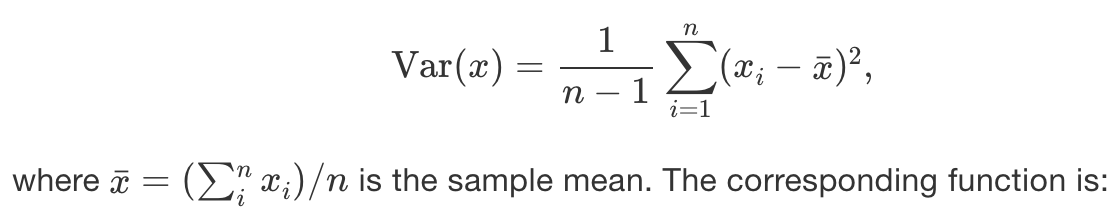

In [40]:
variance <- function(x, na.rm = TRUE) {
  n <- length(x)
  m <- mean(x, na.rm = TRUE)
  sq_err <- (x - m)^2
  sum(sq_err) / (n - 1)
}

In [41]:
var(1:10)
variance(1:10)

[1] 9.166667

[1] 9.166667

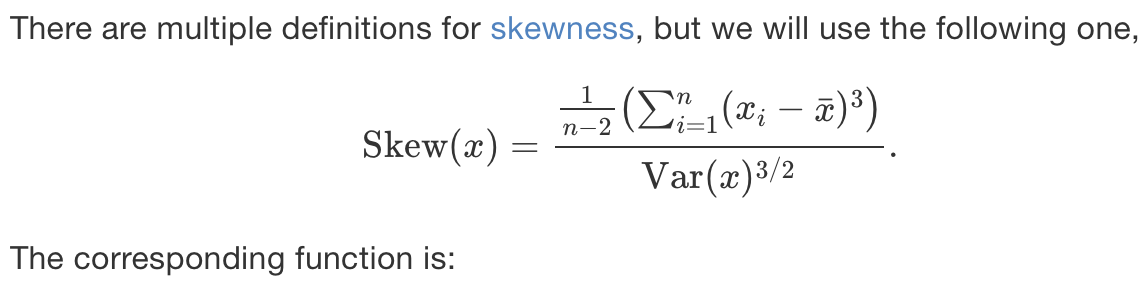

In [42]:
skewness <- function(x, na.rm = FALSE) {
  n <- length(x)
  m <- mean(x, na.rm = na.rm)
  v <- var(x, na.rm = na.rm)
  (sum((x - m)^3) / (n - 2)) / v^(3 / 2)
}

In [43]:
skewness(c(1, 2, 5, 100))

[1] 1.494554

In [44]:
both_na <- function(x, y) {
  sum(is.na(x) & is.na(y))
}
both_na(
  c(NA, NA, 1, 2),
  c(NA, 1, NA, 2)
)
#> [1] 1
both_na(
  c(NA, NA, 1, 2, NA, NA, 1),
  c(NA, 1, NA, 2, NA, NA, 1)
)

[1] 1

[1] 3

In [45]:
is_directory <- function(x) file.info(x)$isdir
is_readable <- function(x) file.access(x, 4) == 0

In [46]:
threat <- function(chances) {
  give_chances(
    from = Good_Fairy,
    to = foo_foo,
    number = chances,
    condition = "Don't behave",
    consequence = turn_into_goon
  )
}

lyric <- function() {
  foo_foo %>%
    hop(through = forest) %>%
    scoop(up = field_mouse) %>%
    bop(on = head)

  down_came(Good_Fairy)
  said(
    Good_Fairy,
    c(
      "Little bunny Foo Foo",
      "I don't want to see you",
      "Scooping up the field mice",
      "And bopping them on the head."
    )
  )
}

lyric()
threat(3)
lyric()
threat(2)
lyric()
threat(1)
lyric()
turn_into_goon(Good_Fairy, foo_foo)

ERROR: Error in foo_foo %>% hop(through = forest) %>% scoop(up = field_mouse) %>% : could not find function "%>%"


In [ ]:
# Too short
f()

# Not a verb, or descriptive
my_awesome_function()

# Long, but clear
impute_missing()
collapse_years()

In [ ]:
# Never do this!
col_mins <- function(x, y) {}
rowMaxes <- function(y, x) {}

In [ ]:
# Good (common prefix)*******
input_select()
input_checkbox()
input_text()

# Not so good
select_input()
checkbox_input()
text_input()

In [ ]:
# Don't do this!
T <- FALSE
c <- 10
mean <- function(x) sum(x)

In [ ]:
# Load data --------------------------------------

# Plot data --------------------------------------

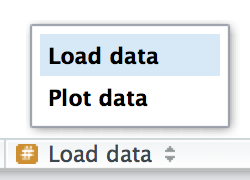

In [47]:
f1 <- function(string, prefix) {
  substr(string, 1, nchar(prefix)) == prefix
}
f2 <- function(x) {
  if (length(x) <= 1) return(NULL)
  x[-length(x)]
}
f3 <- function(x, y) {
  rep(y, length.out = length(x))
}

In [48]:
f1(c("abc", "abcde", "ad"), "ab")

[1]  TRUE  TRUE FALSE

In [49]:
f2(1:3)
f2(1:2)
f2(1)

[1] 1 2

[1] 1

NULL

In [50]:
f3(1:3, 4)

[1] 4 4 4

In [ ]:
if (condition) {
  # code executed when condition is TRUE
} else {
  # code executed when condition is FALSE
}

In [52]:
has_name <- function(x) {
  nms <- names(x)
  if (is.null(nms)) {
    rep(FALSE, length(x))
  } else {
    !is.na(nms) & nms != ""
  }
}

In [53]:
if (c(TRUE, FALSE)) {}

if (NA) {}

Warning message in if (c(TRUE, FALSE)) {:
“the condition has length > 1 and only the first element will be used”

NULL

ERROR: Error in if (NA) {: missing value where TRUE/FALSE needed


In [54]:
identical(0L, 0)

[1] FALSE

In [55]:
x <- sqrt(2) ^ 2
x
x == 2
x - 2

[1] 2

[1] FALSE

[1] 4.440892e-16

In [ ]:
if (this) {
  # do that
} else if (that) {
  # do something else
} else {
  # 
}

In [56]:
# Good
if (y < 0 && debug) {
  message("Y is negative")
}

if (y == 0) {
  log(x)
} else {
  y ^ x
}

# Bad
if (y < 0 && debug)
message("Y is negative")

if (y == 0) {
  log(x)
} 
else {
  y ^ x
}

ERROR: Error in parse(text = x, srcfile = src): <text>:19:1: unexpected 'else'
18: } 
19: else
    ^


In [57]:
y <- 10
x <- if (y < 20) "Too low" else "Too high"

In [58]:
if (y < 20) {
  x <- "Too low" 
} else {
  x <- "Too high"
}

In [60]:
greet <- function(time = lubridate::now()) {
  hr <- lubridate::hour(time)
  # I don't know what to do about times after midnight,
  # are they evening or morning?
  if (hr < 12) {
    print("good morning")
  } else if (hr < 17) {
    print("good afternoon")
  } else {
    print("good evening")
  }
}
greet()
greet(lubridate::ymd_h("2017-01-08:05"))
greet(lubridate::ymd_h("2017-01-08:13"))
greet(lubridate::ymd_h("2017-01-08:20"))


[1] "good evening"
[1] "good morning"
[1] "good afternoon"
[1] "good evening"


In [61]:
fizzbuzz <- function(x) {
  stopifnot(length(x) == 1)
  stopifnot(is.numeric(x))
  # this could be made more efficient by minimizing the
  # number of tests
  if (!(x %% 3) && !(x %% 5)) {
    "fizzbuzz"
  } else if (!(x %% 3)) {
    "fizz"
  } else if (!(x %% 5)) {
    "buzz"
  } else {
    x
  }
}
fizzbuzz(6)
fizzbuzz(10)
fizzbuzz(15)
fizzbuzz(2)

[1] "fizz"

[1] "buzz"

[1] "fizzbuzz"

[1] 2

In [ ]:
if (temp <= 0) {
  "freezing"
} else if (temp <= 10) {
  "cold"
} else if (temp <= 20) {
  "cool"
} else if (temp <= 30) {
  "warm"
} else {
  "hot"
}

In [62]:
temp <- seq(-10, 50, by = 5)
cut(temp, c(-Inf, 0, 10, 20, 30, Inf),
  right = TRUE,
  labels = c("freezing", "cold", "cool", "warm", "hot")
)

[1] freezing freezing freezing cold     cold     cool     cool     warm    
 [9] warm     hot      hot      hot      hot     
Levels: freezing cold cool warm hot

In [64]:
temp <- seq(-10, 50, by = 5)
temp
cut(temp, c(-Inf, 0, 10, 20, 30, Inf),
  right = FALSE,
  labels = c("freezing", "cold", "cool", "warm", "hot")
)

[1] -10  -5   0   5  10  15  20  25  30  35  40  45  50

[1] freezing freezing cold     cold     cool     cool     warm     warm    
 [9] hot      hot      hot      hot      hot     
Levels: freezing cold cool warm hot

In [65]:
switch(1, "apple", "banana", "cantaloupe")
switch(2, "apple", "banana", "cantaloupe")

[1] "apple"

[1] "banana"

In [66]:
switch(1.2, "apple", "banana", "cantaloupe")
switch(2.8, "apple", "banana", "cantaloupe")

[1] "apple"

[1] "banana"

In [76]:
switch(x, 
  a = ,
  b = "ab",
  c = ,
  d = "cd"
)

ERROR: Error in eval(expr, envir, enclos): object 'b' not found


In [77]:
switcheroo <- function(x) {
  switch(x,
    a = ,
    b = "ab",
    c = ,
    d = "cd"
  )
}
switcheroo("a")
switcheroo("b")
switcheroo("c")
switcheroo("d")
switcheroo("e")
switcheroo("f")

[1] "ab"

[1] "ab"

[1] "cd"

[1] "cd"

In [ ]:
switch(x,
  a = "ab",
  b = "ab",
  c = "cd",
  d = "cd",
  NULL # value to return if x not matched
)

In [78]:
# **** good func
# Compute confidence interval around mean using normal approximation
mean_ci <- function(x, conf = 0.95) {
  se <- sd(x) / sqrt(length(x))
  alpha <- 1 - conf
  mean(x) + se * qnorm(c(alpha / 2, 1 - alpha / 2))
}

x <- runif(100)
mean_ci(x)
mean_ci(x, conf = 0.99)

[1] 0.4285893 0.5536512

[1] 0.4089407 0.5732998

In [ ]:
# Good
mean(1:10, na.rm = TRUE)

# Bad
mean(x = 1:10, , FALSE)
mean(, TRUE, x = c(1:10, NA))

In [ ]:
# Good
average <- mean(feet / 12 + inches, na.rm = TRUE)

# Bad
average<-mean(feet/12+inches,na.rm=TRUE)

In [79]:
wt_mean <- function(x, w) {
  sum(x * w) / sum(w)
}
wt_var <- function(x, w) {
  mu <- wt_mean(x, w)
  sum(w * (x - mu) ^ 2) / sum(w)
}
wt_sd <- function(x, w) {
  sqrt(wt_var(x, w))
}

In [80]:
wt_mean(1:6, 1:3)

[1] 7.666667

In [81]:
wt_mean <- function(x, w) {
  if (length(x) != length(w)) {
    stop("`x` and `w` must be the same length", call. = FALSE)
  }
  sum(w * x) / sum(w)
}

In [82]:
wt_mean <- function(x, w, na.rm = FALSE) {
  if (!is.logical(na.rm)) {
    stop("`na.rm` must be logical")
  }
  if (length(na.rm) != 1) {
    stop("`na.rm` must be length 1")
  }
  if (length(x) != length(w)) {
    stop("`x` and `w` must be the same length", call. = FALSE)
  }
  
  if (na.rm) {
    miss <- is.na(x) | is.na(w)
    x <- x[!miss]
    w <- w[!miss]
  }
  sum(w * x) / sum(w)
}

In [83]:
wt_mean <- function(x, w, na.rm = FALSE) {
  stopifnot(is.logical(na.rm), length(na.rm) == 1)
  stopifnot(length(x) == length(w))
  
  if (na.rm) {
    miss <- is.na(x) | is.na(w)
    x <- x[!miss]
    w <- w[!miss]
  }
  sum(w * x) / sum(w)
}
wt_mean(1:6, 6:1, na.rm = "foo")

ERROR: Error in wt_mean(1:6, 6:1, na.rm = "foo"): is.logical(na.rm) is not TRUE


In [84]:
sum(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
stringr::str_c("a", "b", "c", "d", "e", "f")

[1] 55

[1] "abcdef"

In [86]:
commas <- function(...) stringr::str_c(..., collapse = ", ")
commas(letters[1:10])

rule <- function(..., pad = "-") {
  title <- paste0(...)
  width <- getOption("width") - nchar(title) - 5
  cat(title, " ", stringr::str_dup(pad, width), "\n", sep = "")
}
rule("Important output")

[1] "a, b, c, d, e, f, g, h, i, j"

Important output -----------------------------------------------------------


In [103]:
?sum

In [108]:
x <- c(10, 10)
sum(x, na.mr = TRUE)

[1] 20

Arguments in R are lazily evaluated: they’re not computed until they’re needed. That means if they’re never used, they’re never called. This is an important property of R as a programming language, but is generally not important when you’re writing your own functions for data analysis. You can read more about lazy evaluation at http://adv-r.had.co.nz/Functions.html#lazy-evaluation.

In [110]:
commas <- function(...) {
  str_c(..., collapse = ", ")
}

In [111]:
commas(letters, collapse = "-")

ERROR: Error in str_c(..., collapse = ", "): could not find function "str_c"


In [ ]:
str_c(letters, collapse = "-", collapse = ", ")

In [112]:
commas <- function(..., collapse = ", ") {
  str_c(..., collapse = collapse)
}

In [113]:
rule <- function(..., pad = "-") {
  title <- paste0(...)
  width <- getOption("width") - nchar(title) - 5
  cat(title, " ", str_dup(pad, width), "\n", sep = "")
}

In [114]:
rule("Important output")

ERROR: Error in str_dup(pad, width): could not find function "str_dup"


In [115]:
rule("Valuable output", pad = "-+")

ERROR: Error in str_dup(pad, width): could not find function "str_dup"


In [116]:
rule <- function(..., pad = "-") {
  title <- paste0(...)
  width <- getOption("width") - nchar(title) - 5
  padding <- str_dup(
    pad,
    ceiling(width / str_length(title))
  ) %>%
    str_trunc(width)
  cat(title, " ", padding, "\n", sep = "")
}
rule("Important output")
#> Important output ----
rule("Valuable output", pad = "-+")
#> Valuable output -+-+-+-+
rule("Vital output", pad = "-+-")

ERROR: Error in str_dup(pad, ceiling(width/str_length(title))) %>% str_trunc(width): could not find function "%>%"


In [ ]:
complicated_function <- function(x, y, z) {
  if (length(x) == 0 || length(y) == 0) {
    return(0)
  }
    
  # Complicated code here
}

In [ ]:
f <- function() {
  if (x) {
    # Do 
    # something
    # that
    # takes
    # many
    # lines
    # to
    # express
  } else {
    # return something short
  }
}

In [ ]:
f <- function() {
  if (!x) {
    return(something_short)
  }

  # Do 
  # something
  # that
  # takes
  # many
  # lines
  # to
  # express
}

In [117]:
show_missings <- function(df) {
  n <- sum(is.na(df))
  cat("Missing values: ", n, "\n", sep = "")
  
  invisible(df)
}

In [118]:
show_missings(mtcars)

Missing values: 0


In [119]:
x <- show_missings(mtcars) 
class(x)
dim(x)

Missing values: 0


[1] "data.frame"

[1] 32 11

In [120]:
mtcars %>% 
  show_missings() %>% 
  mutate(mpg = ifelse(mpg < 20, NA, mpg)) %>% 
  show_missings()

ERROR: Error in mtcars %>% show_missings() %>% mutate(mpg = ifelse(mpg < 20, : could not find function "%>%"


In [121]:
f <- function(x) {
  x + y
} 

In [122]:
y <- 100
f(10)

y <- 1000
f(10)


[1] 110

[1] 1010

In [129]:
?table

In [123]:
`+` <- function(x, y) {
  if (runif(1) < 0.1) {
    sum(x, y)
  } else {
    sum(x, y) * 1.1
  }
}
table(replicate(1000, 1 + 2))
rm(`+`)


  3 3.3 
105 895 